# 🎓 Jamboree Admissions - Linear Regression Model
Predicting Chance of Admission Using Academic and Profile Data  
Dataset: 500 student profiles (GRE, TOEFL, CGPA, Research, etc.)

# **📊Data Cleaning and EDA**

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 🧹 Data Loading & Cleaning
- Load dataset and remove irrelevant columns (like Serial No.)
- Check for missing values

In [5]:
df = pd.read_csv('/content/sample_data/Jamboree_Admission.csv')

In [6]:
print(df.shape)
df.head()

(500, 9)


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [7]:
df = df.drop('Serial No.', axis=1)
df.isnull().sum()

,0
GRE Score,0
TOEFL Score,0
University Rating,0
SOP,0
LOR,0
CGPA,0
Research,0
Chance of Admit,0


## 🔄 Relationship Between Features

Univariate Analysis

Understand the distribution of each feature like GRE, TOEFL, CGPA, etc.

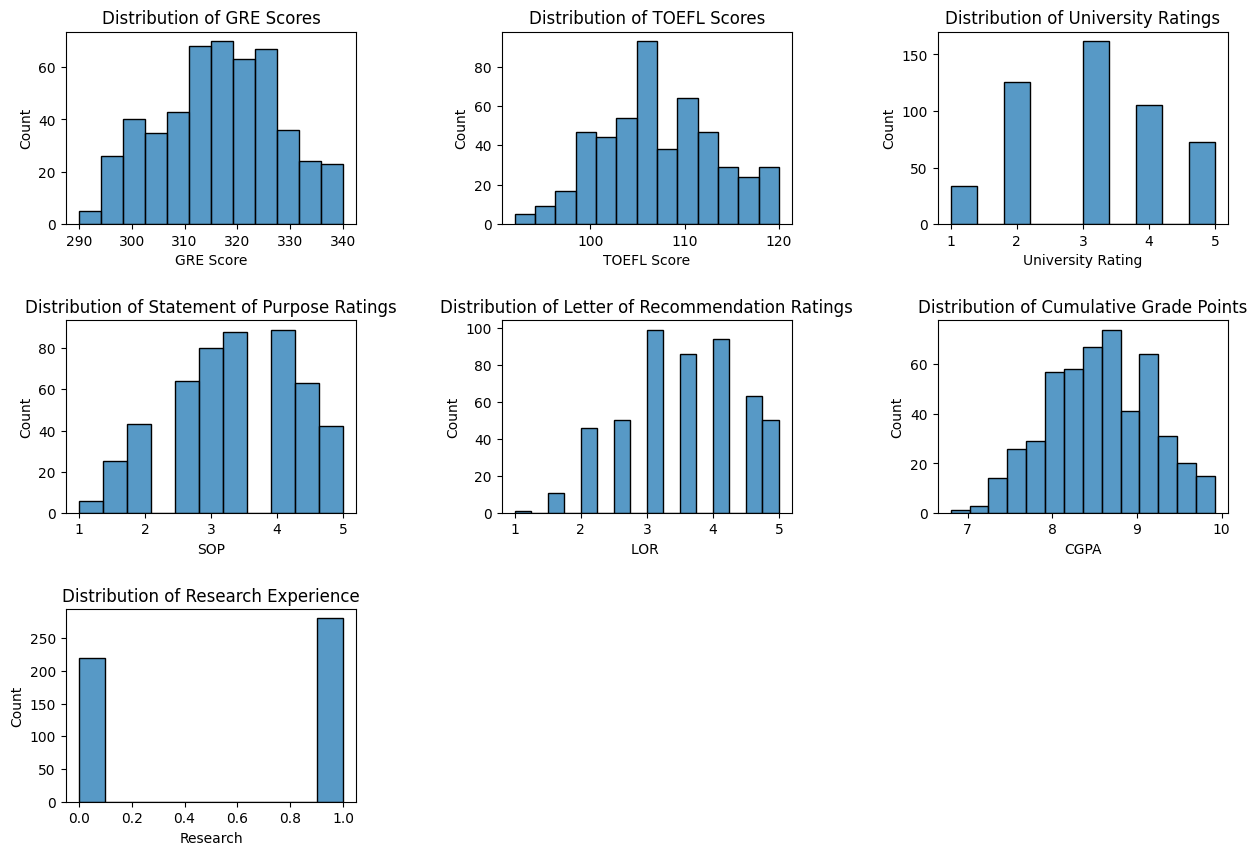

In [8]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

sns.histplot(df['GRE Score'], kde=False, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of GRE Scores')

sns.histplot(df['TOEFL Score'], kde=False, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of TOEFL Scores')

sns.histplot(df['University Rating'], kde=False, ax=axes[0, 2])
axes[0, 2].set_title('Distribution of University Ratings')

sns.histplot(df['SOP'], kde=False, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Statement of Purpose Ratings')

sns.histplot(df['LOR '], kde=False, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Letter of Recommendation Ratings')

sns.histplot(df['CGPA'], kde=False, ax=axes[1, 2])
axes[1, 2].set_title('Distribution of Cumulative Grade Points')

sns.histplot(df['Research'], kde=False, ax=axes[2, 0])
axes[2, 0].set_title('Distribution of Research Experience')

# Hide unused subplots
fig.delaxes(axes[2, 1])
fig.delaxes(axes[2, 2])

plt.show()

It is clear from the distributions, students with varied merit apply for the university.

Bivariate Analysis

Checking relationships between features using scatter and regression plots.

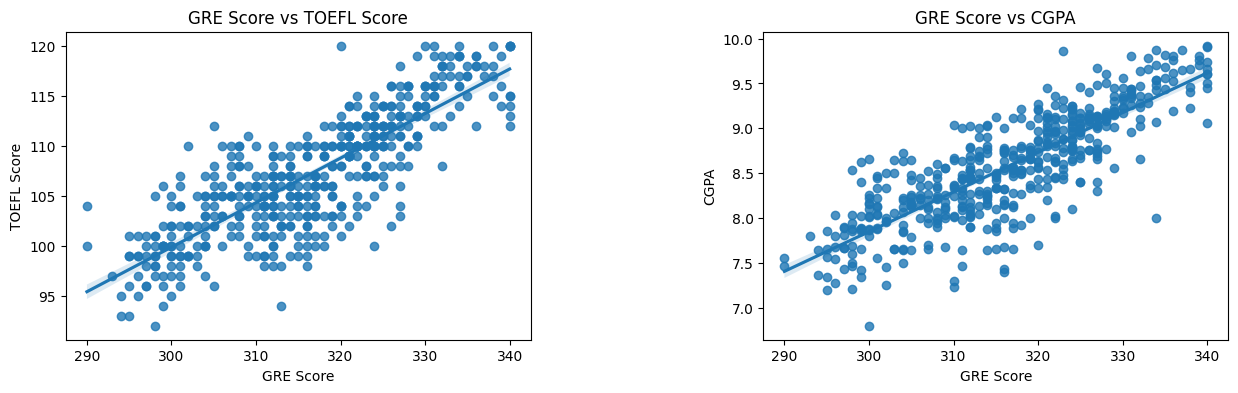

In [43]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

sns.regplot(x='GRE Score', y= 'TOEFL Score', data=df, ax=axes[0, 0])
axes[0, 0].set_title('GRE Score vs TOEFL Score')

sns.regplot(x='GRE Score', y= 'CGPA', data=df, ax=axes[0, 1])
axes[0, 1].set_title('GRE Score vs CGPA')

fig.delaxes(axes[1, 1])
fig.delaxes(axes[1, 0])


plt.show()

People with higher GRE Scores also have higher TOEFL Scores which is justified because both TOEFL and GRE have a verbal section which although not similar are relatable

Although there are exceptions, people with higher CGPA usually have higher GRE scores maybe because they are smart or hard working

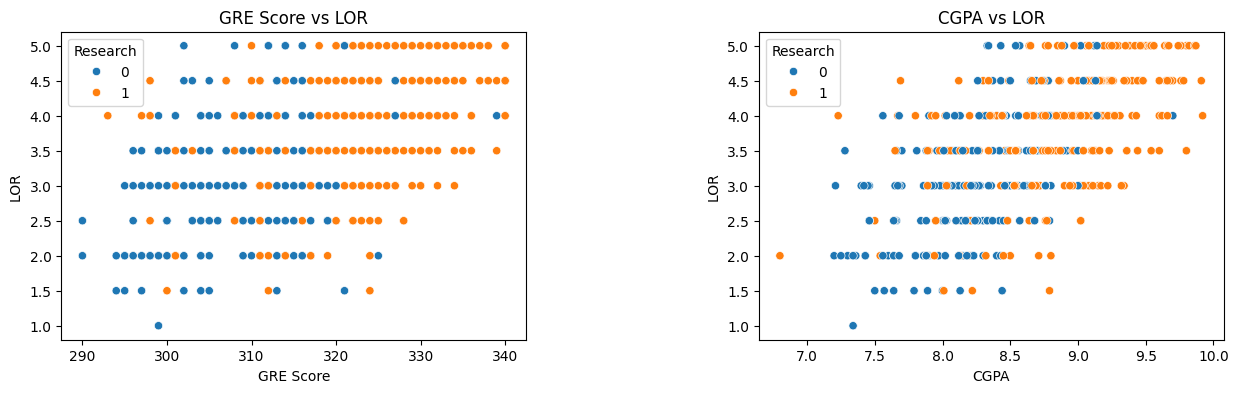

In [10]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

sns.scatterplot(x='GRE Score' , y = 'LOR ', data=df, hue="Research", ax=axes[0, 0])
axes[0, 0].set_title('GRE Score vs LOR')

sns.scatterplot(x='CGPA', y= 'LOR ', data=df, hue="Research", ax=axes[0, 1])
axes[0, 1].set_title('CGPA vs LOR')

fig.delaxes(axes[1, 1])
fig.delaxes(axes[1, 0])

plt.show()

LORs are not that related with CGPA so it is clear that a persons LOR is not dependent on that persons academic excellence. Having research experience is usually related with a good LOR which might be justified by the fact that supervisors have personal interaction with the students performing research which usually results in good LORs

GRE scores and LORs are also not that related. People with different kinds of LORs have all kinds of GRE scores


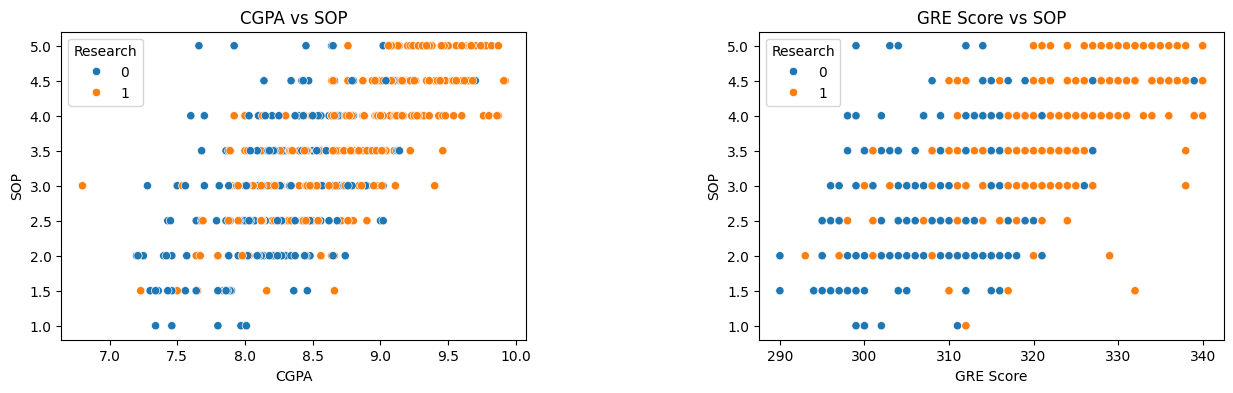

In [11]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,10))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

sns.scatterplot(x='CGPA', y= 'SOP', data=df, hue="Research", ax=axes[0, 0])
axes[0, 0].set_title('CGPA vs SOP')

sns.scatterplot(x='GRE Score', y= 'SOP', data=df, hue="Research", ax=axes[0, 1])
axes[0, 1].set_title('GRE Score vs SOP')

fig.delaxes(axes[1, 1])
fig.delaxes(axes[1, 0])

plt.show()

CGPA and SOP are not that related because Statement of Purpose is related to academic performance, but since people with good CGPA tend to be more hard working so they have good things to say in their SOP which might explain the slight move towards higher CGPA as along with good SOPs

Similary, GRE Score and CGPA is only slightly related


## 🔥Correlation Matrix


Visualizing correlations between features and the target variable.




Heatmap of feature correlation

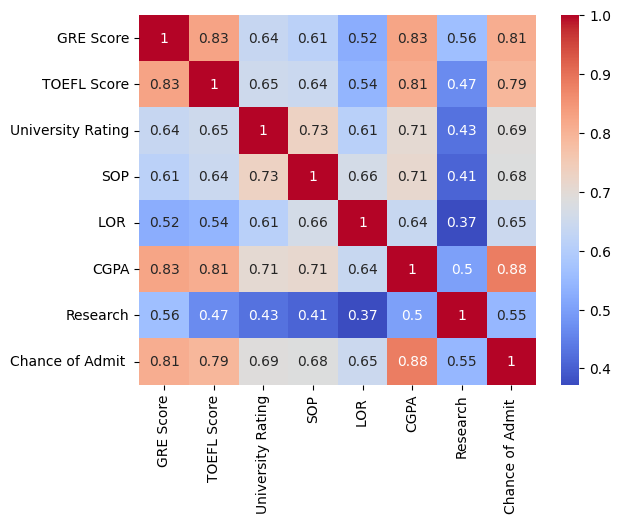

In [12]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

Bar chart of feature correlation

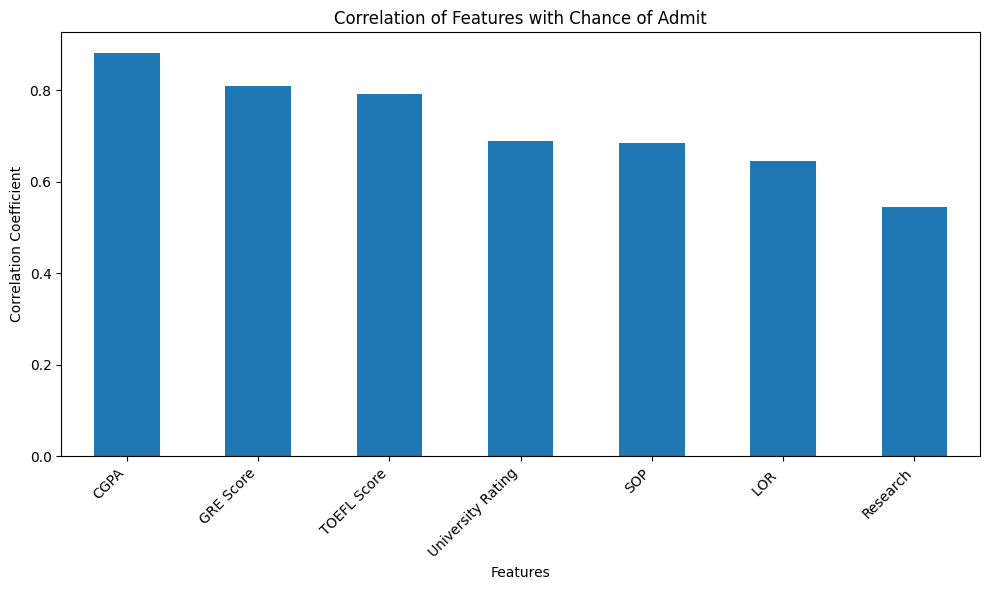

In [13]:
# Calculate correlations
corr = df.corr()

# Get correlations with the target variable 'Chance of Admit'
target_corr = corr['Chance of Admit '].drop('Chance of Admit ')

# Plot bar chart of correlations
plt.figure(figsize=(10, 6))
target_corr.sort_values(ascending=False).plot(kind='bar')
plt.title('Correlation of Features with Chance of Admit')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# **📉Model Training & Validation**



In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
## spliting the dataset for train & test.
X = df.drop('Chance of Admit ', axis=1)
y = df['Chance of Admit ']

## 🏗️ Train/Test Split & Standardization
- Split data into training and testing sets
- Apply StandardScaler for feature scaling


In [15]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [16]:
x_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
23,334,119,5,5.0,4.5,9.70,1
172,322,110,4,4.0,5.0,9.13,1
148,339,116,4,4.0,3.5,9.80,1
332,308,106,3,3.5,2.5,8.21,1
153,324,105,3,3.0,4.0,8.75,0
...,...,...,...,...,...,...,...
439,312,105,2,1.5,3.0,8.46,0
30,300,97,2,3.0,3.0,8.10,1
0,337,118,4,4.5,4.5,9.65,1
62,304,105,2,3.0,3.0,8.20,1


In [17]:
y_train

,Chance of Admit
23,0.95
172,0.86
148,0.96
332,0.75
153,0.79
...,...
439,0.66
30,0.65
0,0.92
62,0.54


**Standardization**

In [18]:
x_train_columns = x_train.columns

std= StandardScaler()
x_train_std = std.fit_transform(x_train)


In [19]:
x_train_std

array([[ 1.51118424e+00,  1.91282712e+00,  1.62040588e+00, ...,
         1.09917233e+00,  1.84056018e+00,  8.81917104e-01],
       [ 4.60686869e-01,  4.45497558e-01,  7.57340163e-01, ...,
         1.64944633e+00,  8.98188078e-01,  8.81917104e-01],
       [ 1.94889148e+00,  1.42371726e+00,  7.57340163e-01, ...,
        -1.37568501e-03,  2.00588862e+00,  8.81917104e-01],
       ...,
       [ 1.77380858e+00,  1.74979050e+00,  7.57340163e-01, ...,
         1.09917233e+00,  1.75789596e+00,  8.81917104e-01],
       [-1.11505919e+00, -3.69685531e-01, -9.68791263e-01, ...,
        -5.51649691e-01, -6.39366406e-01,  8.81917104e-01],
       [-1.02751774e+00, -8.58795384e-01, -9.68791263e-01, ...,
        -1.10192370e+00, -6.72432094e-01, -1.13389342e+00]])

In [20]:
x_train=pd.DataFrame(x_train_std, columns=x_train_columns)


In [21]:
x_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1.511184,1.912827,1.620406,1.610030,1.099172,1.840560,0.881917
1,0.460687,0.445498,0.757340,0.604547,1.649446,0.898188,0.881917
2,1.948891,1.423717,0.757340,0.604547,-0.001376,2.005889,0.881917
3,-0.764893,-0.206649,-0.105726,0.101805,-1.101924,-0.622834,0.881917
4,0.635770,-0.369686,-0.105726,-0.400936,0.548898,0.269940,-1.133893
...,...,...,...,...,...,...,...
395,-0.414728,-0.369686,-0.968791,-1.909161,-0.551650,-0.209512,-1.133893
396,-1.465225,-1.673978,-0.968791,-0.400936,-0.551650,-0.804695,0.881917
397,1.773809,1.749790,0.757340,1.107288,1.099172,1.757896,0.881917
398,-1.115059,-0.369686,-0.968791,-0.400936,-0.551650,-0.639366,0.881917


## 🤖 Model Building & Comparison
Train and compare Linear Regression, Ridge, and Lasso models.

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Lasso,Ridge,LinearRegression

In [23]:
models = [
   ['Linear Regression :', LinearRegression()],
    ['Lasso Regression :', Lasso(alpha=0.1)],
    ['Ridge Regression :', Ridge(alpha=1.0)]
          ]

print("Result without removing features with multicollinearity......")

# Transform the test set using the fitted scaler and convert back to DataFrame with column names
x_test_std = std.transform(x_test)
x_test_std = pd.DataFrame(x_test_std, columns=x_train_columns)

for name, model in models:
  model.fit(x_train, y_train.values)
  predictions = model.predict(x_test_std)
  print(name, mean_squared_error(y_test, predictions))

Result without removing features with multicollinearity......
Linear Regression : 0.0031675479053113265
Lasso Regression : 0.01563789441625618
Ridge Regression : 0.0031703672575757237


## 📋 Model Summary using Statsmodels

Check p-values, coefficients, and R² to understand feature significance.



In [24]:
import statsmodels.api as sm

x_train = sm.add_constant(x_train)
model = sm.OLS(y_train.values, x_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     244.7
Date:                Sun, 03 Aug 2025   Prob (F-statistic):          8.37e-139
Time:                        11:45:51   Log-Likelihood:                 555.09
No. Observations:                 400   AIC:                            -1094.
Df Residuals:                     392   BIC:                            -1062.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.7247      0.00

## ❌ Removing Insignificant Feature (SOP)
P-value for SOP is high (p > 0.05), hence we drop it and refit the model.

In [25]:
x_train_new = x_train.drop(columns='SOP')

In [26]:
model1 = sm.OLS(y_train.values, x_train_new).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     286.2
Date:                Sun, 03 Aug 2025   Prob (F-statistic):          4.87e-140
Time:                        11:45:51   Log-Likelihood:                 555.06
No. Observations:                 400   AIC:                            -1096.
Df Residuals:                     393   BIC:                            -1068.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.7247      0.00

*   **CGPA**: For every one standard deviation increase in CGPA, the Chance of Admit increases by approximately 0.0704, holding all other variables constant. This suggests that CGPA is a strong positive predictor of admission chance.
*   **GRE Score**: For every one standard deviation increase in GRE Score, the Chance of Admit increases by approximately 0.0186, holding all other variables constant. GRE Score also has a positive impact on admission chances.
*   **TOEFL Score**: For every one standard deviation increase in TOEFL Score, the Chance of Admit increases by approximately 0.0157, holding all other variables constant. TOEFL Score is another positive predictor of admission chance.
*   **LOR**: For every one standard deviation increase in LOR rating, the Chance of Admit increases by approximately 0.0161, holding all other variables constant. A stronger letter of recommendation is associated with a higher chance of admission.
*   **Research**: Having research experience (Research = 1) increases the Chance of Admit by approximately 0.0145 standard deviations compared to not having research experience (Research = 0), holding all other variables constant.

## 🧠 Multicollinearity Check (VIF)
Ensure no independent feature is highly correlated with another.

* VIF score of an independent variable represents how well the variable is explained by other independent variables.

* So, the closer the R^2 value to 1, the higher the value of VIF and the higher the multicollinearity with the particular independent variable.

In [27]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(dataset,col):
  dataset = dataset.drop(columns=col,axis=1)
  vif=pd.DataFrame()
  vif['features']=dataset.columns
  vif['VIF_Value']=[variance_inflation_factor(dataset.values,i) for i in range(dataset.shape[1])]
  return vif

In [28]:
calculate_vif(x_train_new,[])

,features,VIF_Value
0,const,1.000000
1,GRE Score,4.588610
2,TOEFL Score,3.807383
3,University Rating,2.328273
4,LOR,1.924370
5,CGPA,4.627455
6,Research,1.480684


## ✅ Final Model Prediction & Evaluation
- Predict on test data using the refined model
- Calculate MAE and RMSE


In [29]:
x_test_std = std.transform(x_test)

In [30]:
x_test = pd.DataFrame(x_test_std, columns=x_train_columns)

In [31]:
x_test = sm.add_constant(x_test)

In [32]:
x_test_del=list(set(x_test.columns).difference(set(x_train_new.columns)))

In [33]:
print(f'Dropping {x_test_del} from test set')

Dropping ['SOP'] from test set


In [34]:
x_test_new=x_test.drop(columns=x_test_del)

In [35]:
#Prediction from the clean model
pred = model1.predict(x_test_new)

from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

print('Mean Absolute Error ', mean_absolute_error(y_test.values,pred) )
print('Root Mean Square Error ', np.sqrt(mean_squared_error(y_test.values,pred) ))

Mean Absolute Error  0.04197756808622117
Root Mean Square Error  0.056301118338088214


Here is a comparison of the Mean Squared Error for the Linear Regression, Lasso Regression, and Ridge Regression models:

Model	Mean Squared Error
* Linear Regression	0.0031675479053113265
* Lasso Regression	0.01563789441625618
* Ridge Regression	0.0031703672575757237

Based on the Mean Squared Error, both Linear Regression and Ridge Regression performed better than Lasso Regression on this dataset.

## 📉 Residual Analysis
Check for normal distribution and constant variance of residuals.


In [36]:
residuals = y_test.values-pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals -0.0031724586954730836


 Test for Homoscedasticity




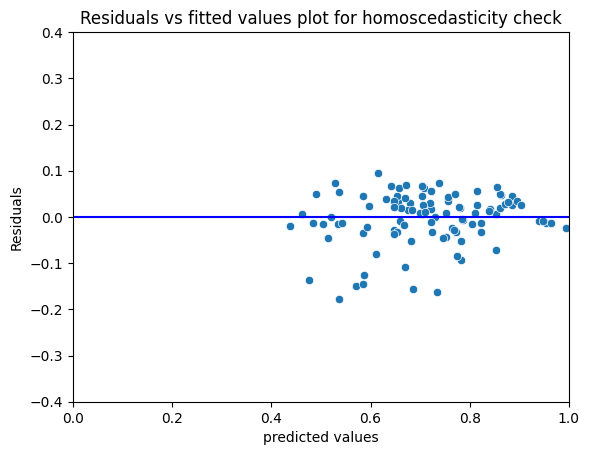

In [37]:
p = sns.scatterplot(x=pred,y=residuals)
plt.xlabel('predicted values')
plt.ylabel('Residuals')
plt.ylim(-0.4,0.4)
plt.xlim(0,1)
p = sns.lineplot(x=[0,26], y=[0,0], color='blue')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')

In [38]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residuals, x_test)
lzip(name, test)

[('F statistic', np.float64(0.8352209133350847)),
 ('p-value', np.float64(0.7189101333026777))]

**Here null hypothesis is - error terms are homoscedastic and since p-values >0.05, we fail to reject the null hypothesis**

Normality of residuals

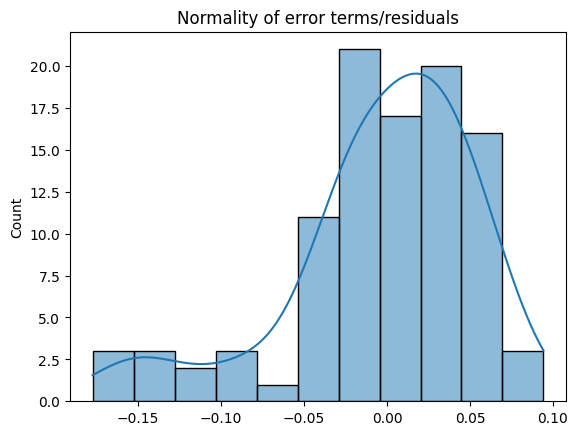

In [39]:
p = sns.histplot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')

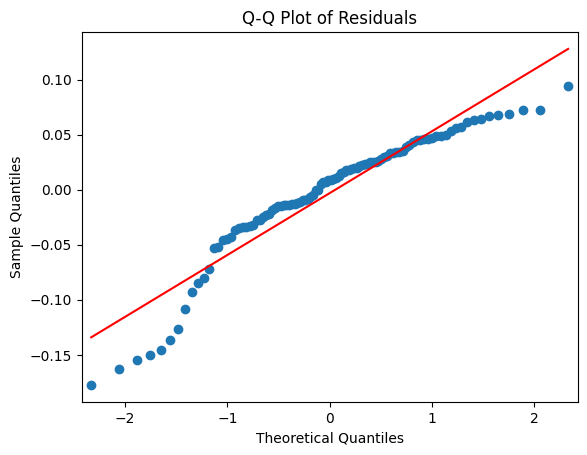

In [42]:
#Q-Q plot for residuals (normality check)
import statsmodels.api as sm
sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot of Residuals')
plt.show()

Text(0, 0.5, 'y_pred')

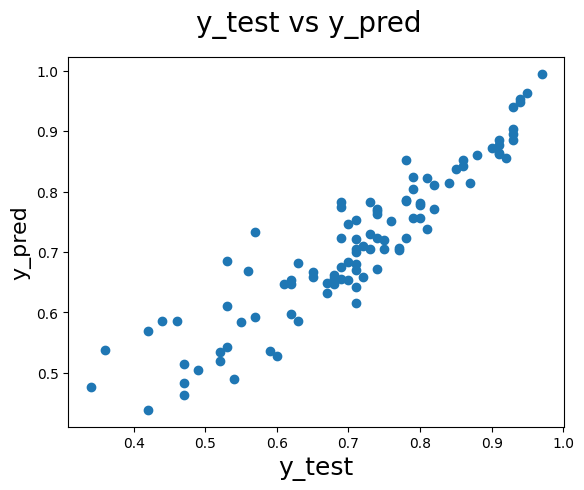

In [40]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test.values, pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

# **💡BUSINESS INSIGHTS & RECOMMENDATIONS :**

## **Insights**

* CGPA is the most significant factor influencing the chance of admission (Coefficient ≈ 0.07).

* GRE and TOEFL scores have moderate positive impacts (each contributing ≈ 0.02).

* LOR and Research also significantly improve admission chances.

* SOP and University Rating are statistically less significant and may vary in influence by region or reviewer.

* Students with research experience consistently show higher predicted chances, independent of CGPA/GRE.

## ***Recommendations***



* Focus on CGPA improvement strategy for students aiming for top admits.

* Encourage students to pursue research, as it boosts LOR quality and overall profile.

* Develop a predictive admission calculator (using this model) to help students assess their chance of admission.

* Use model to personalize coaching plans based on weak areas (e.g., GRE or SOP).

* Deprioritize SOP length/quality in evaluations unless it’s made quantifiable.

